# 3C454.3 analysis notebook
Reference paper: https://arxiv.org/pdf/1106.5162.pdf

In [1]:
from agilepy.api.AGAnalysis import AGAnalysis

In [ ]:
# Interactive plots
#%matplotlib widget

## Creating a configuration file

In [2]:
confFilePath = "$HOME/agilepy_conf.yaml"

In [3]:
AGAnalysis.getConfiguration(
    confFilePath = confFilePath,
    evtfile="$AGILE/agilepy-test-data/test_dataset_agn/EVT/EVT.index",
    logfile="$AGILE/agilepy-test-data/test_dataset_agn/LOG/LOG.index",
    userName = "username",
    sourceName = "3C454_3",
    tmin = 55513.0,
    tmax = 55521.0,
    timetype = "MJD",
    glon = 86.11,
    glat = -38.18,
    outputDir = "$HOME/agilepy_analysis",
    verboselvl = 0,
    userestapi=False
)

## Obtaining the AGAnalysis object

In [4]:
ag = AGAnalysis(confFilePath)

In [5]:
#print all options of the configuration file
ag.setOptions(binsize=0.5, expstep=2, mapsize=25)
ag.setOptions(energybins=[[100, 50000]])
ag.printOptions()

{ 'ap': {'radius': 3, 'timeslot': 3600},
  'input': { 'datapath': 'None',
             'evtfile': '/home/antonio/anaconda3/envs/agilepydev/agiletools/agilepy-test-data/test_dataset_agn/EVT/EVT.index',
             'logfile': '/home/antonio/anaconda3/envs/agilepydev/agiletools/agilepy-test-data/test_dataset_agn/LOG/LOG.index',
             'userestapi': False},
  'maps': { 'binsize': 0.5,
            'energybins': [[100, 50000]],
            'expstep': 2,
            'fovbinnumber': 1,
            'mapsize': 25,
            'offaxisangle': 30,
            'proj': 'ARC',
            'projtype': 'WCS',
            'spectralindex': 2.1,
            'timestep': 160,
            'useEDPmatrixforEXP': False},
  'mle': { 'contourpoints': 40,
           'edpcorrection': 0.75,
           'expratio_maxthr': 15,
           'expratio_minthr': 0,
           'expratio_size': 10,
           'expratioevaluation': True,
           'fluxcorrection': 0,
           'integratortype': 1,
           'loccl': 

## Sources hypothesis

In [6]:
sources = ag.loadSourcesFromCatalog("2AGL", rangeDist = (0, 5), show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2247+1558 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: none
  * Initial source parameters:
	- flux (ph/cm2s): 6.0533e-08
	- index : 2.75651
	- Source position (l,b): (84.2229, -37.4782)
	- Distance from map center (deg): 1.6474

-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: none
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07
	- index : 2.20942
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011


## Adding a source at runtime

In [ ]:
#newSourceDict = {
#    "glon" : 86.11,
#    "glat": -38.18,
#    "spectrumType" : "PowerLaw",
#    "flux": 100e-08,
#    "index": 2.1
#}
#s = ag.addSource("CYGX3", newSourceDict)

#print(s)

## Deleting sources
Selection params = [name, dist, flux, sqrtts]

In [7]:
deletedSources = ag.deleteSources('flux <= 10e-08', show = True)


-----------------------------------------------------------
 Source name: 2AGLJ2247+1558 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: none
  * Initial source parameters:
	- flux (ph/cm2s): 6.0533e-08
	- index : 2.75651
	- Source position (l,b): (84.2229, -37.4782)
	- Distance from map center (deg): 1.6474


## Selecting sources

In [8]:
sources = ag.selectSources("flux > 0", show = True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: none
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07
	- index : 2.20942
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011


## Free a source's parameter
Freeable params = [flux, index, index1, index2, cutoffEnergy, pivotEnergy, curvature, pos]

In [9]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "flux", True, show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: flux
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07
	- index : 2.20942
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011


In this example, only one source is affected.

## Analysis

In [10]:
#Generate maps
maplistfile = ag.generateMaps()

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [11]:
! cat $maplistfile

/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/maps/0/analysis_product_TN216691200.0_TX217382400.0_EN00100_EX50000_ID01.cts.gz /home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/maps/0/analysis_product_TN216691200.0_TX217382400.0_EN00100_EX50000_ID01.exp.gz /home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/maps/0/analysis_product_TN216691200.0_TX217382400.0_EN00100_EX50000_ID01.gas.gz 30 -1 -1


Generating plot..please wait.
2022-02-09 10:26:45,840 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)


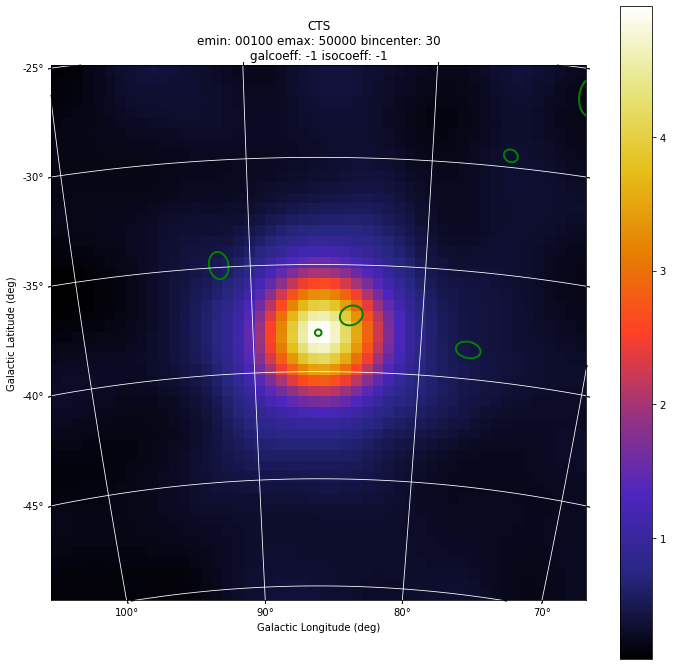

[None]

In [12]:
#Display counts map
ag.displayCtsSkyMaps(maplistFile=maplistfile, smooth=3, catalogRegions="2AGL", catalogRegionsColor="green")

Generating plot..please wait.
2022-02-09 10:26:51,840 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)


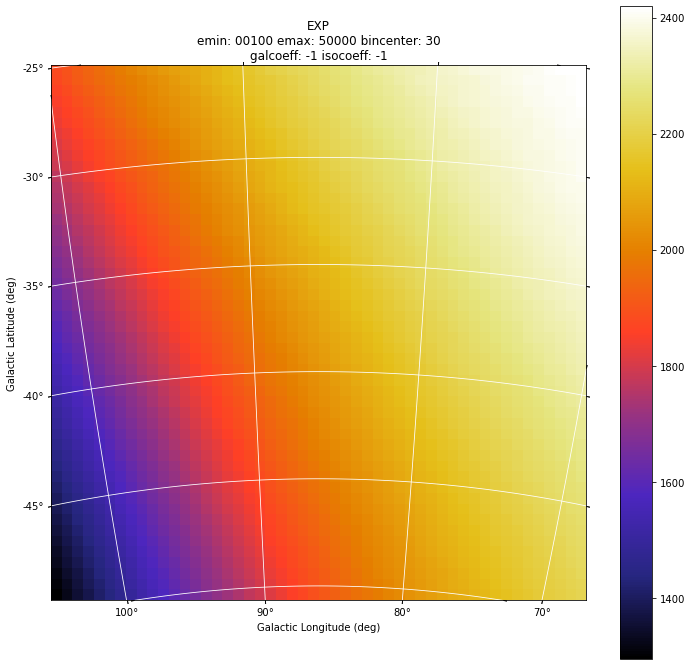

[None]

In [13]:
#Display exposure map
ag.displayExpSkyMaps()

Generating plot..please wait.
2022-02-09 10:26:54,275 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)


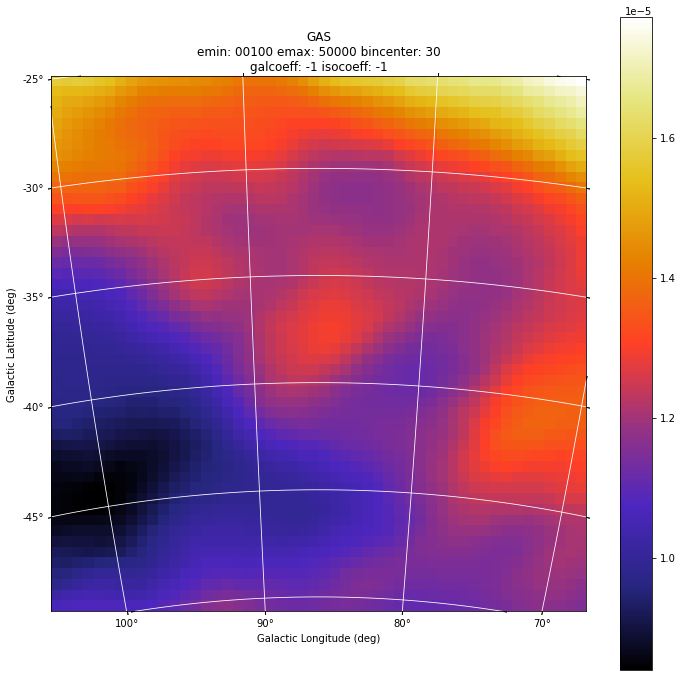

[None]

In [14]:
#Display diffuse emission map
ag.displayGasSkyMaps()

In [15]:
#Fix the diffuse emission coefficient to a default value. 
ag.setOptions(galcoeff=[0.7])

In [ ]:
#! cat $maplistfile

In [16]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0.7],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [-1],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [17]:
#calculate a mean value of isotropic and diffuse emission coefficients. 
gal,iso,maplist = ag.calcBkg("2AGLJ2254+1609", galcoeff = [0.7], pastTimeWindow = 0)

Computing background coefficients..please wait.
Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [18]:
print(iso)

[9.39942]


In [ ]:
#! cat $maplistfile

In [ ]:
#ag.printOptions("model")

In [19]:
#Perform a maximum likelihood estimator
ag.mle()

['/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/mle/0/analysis_product_2AGLJ2254+1609.source']

In [20]:
#Display the results
ag.selectSources("sqrtts > 0", show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 22.8362
  * Spectrum type: PowerLaw
  * Free parameters: flux
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07
	- index : 2.20942
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:27:24.269184):
	- flux (ph/cm2s): 7.5094e-07 +/- 0.0000e+00
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 7.50937e-07
	- ergLog(erg/cm2s): 1.20391e-10 +/- 0
	- galCoeff: [0.7] +/- [6.94429e-310]
	- isoCoeff: [9.39942] +/- [6.9443e-310]
	- exposure(cm2s): 27077100.0
	- exp-ratio: 0
	- L_peak: 86.1236
	- B_peak: -38.1824
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
-----------------------------------------------------------


### Light curve with default tmin and tmax

In [21]:
lightCurveData = ag.lightCurveMLE("2AGLJ2254+1609", binsize=86400)

Computing light curve bins..please wait.


Temporal bin loop:   0%|          | 0/8 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [22]:
cat $lightCurveData

time_start_mjd time_end_mjd sqrt(ts) flux flux_err flux_ul gal gal_error iso iso_error l_peak b_peak dist_peak l b r ell_dist a b phi exposure ExpRatio counts counts_err Index Index_Err Par2 Par2_Err Par3 Par3_Err Erglog Erglog_Err Erglog_UL time_start_utc time_end_utc time_start_tt time_end_tt Fix index ULConfidenceLevel SrcLocConfLevel start_l start_b start_flux typefun par2 par3 galmode2 galmode2fit isomode2 isomode2fit edpcor fluxcor integratortype expratioEval expratio_minthr expratio_maxthr expratio_size Emin emax fovmin fovmax albedo binsize expstep phasecode fit_cts fit_fitstatus0 fit_fcn0 fit_edm0 fit_nvpar0 fit_nparx0 fit_iter0 fit_fitstatus1 fit_fcn1 fit_edm1 fit_nvpar1 fit_nparx1 fit_iter1 fit_Likelihood1
55513.0 55514.0 5.547 628.598e-08 188.701e-08 1059.69e-08 0.7 0 9.39942 0 86.1236 -38.1824 0 -1 -1 -1 -1 -1 -1 -1 3438060.0 0 21.6116 6.48764 2.20942 0 0 0 0 0 1.00777e-09 3.02526e-10 1.69891e-09 2010-11-13T00:00:00.000 2010-11-14T00:00:00.000 216691200.0 216777600.0 1 2.2

In [23]:
print(lightCurveData)

/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/lc/0/light_curve_216691200_217382400.txt


In [24]:
ag.displayLightCurve("mle")

Generating plot..please wait.


### Light curve with explicit tmin and tmax

In [25]:
lightCurveData = ag.lightCurveMLE("2AGLJ2254+1609", tmin=55513.0, tmax=55515.0, timetype="MJD", binsize=86400)

Computing light curve bins..please wait.


Temporal bin loop:   0%|          | 0/2 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [ ]:
#cat $lightCurveData

In [26]:
ag.displayLightCurve("mle")

Generating plot..please wait.


### Evaluation of spectral index of pre-flare period 55513.00-55517.00

In [27]:
ag.setOptionTimeMJD(55513.0, 55517.0)
ag.setOptions(energybins=[[100, 300], [300, 1000], [1000, 3000], [3000, 10000], [10000, 50000]])
ag.setOptions(galcoeff=[0.7, 0.7, 0.7, 0.7, 0.7])
ag.setOptions(isocoeff=[-1, -1, -1, -1, -1])

In [28]:
ag.printOptions("maps")

{ 'binsize': 0.5,
  'energybins': [ [100, 300],
                  [300, 1000],
                  [1000, 3000],
                  [3000, 10000],
                  [10000, 50000]],
  'expstep': 2,
  'fovbinnumber': 1,
  'mapsize': 25,
  'offaxisangle': 30,
  'proj': 'ARC',
  'projtype': 'WCS',
  'spectralindex': 2.1,
  'timestep': 160,
  'useEDPmatrixforEXP': False}


In [29]:
maplistfile = ag.generateMaps()

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [30]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "index", True, show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 22.8362
  * Spectrum type: PowerLaw
  * Free parameters: flux index
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07
	- index : 2.20942
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:27:24.269184):
	- flux (ph/cm2s): 7.5094e-07 +/- 0.0000e+00
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 7.50937e-07
	- ergLog(erg/cm2s): 1.20391e-10 +/- 0
	- galCoeff: [0.7] +/- [6.94429e-310]
	- isoCoeff: [9.39942] +/- [6.9443e-310]
	- exposure(cm2s): 27077100.0
	- exp-ratio: 0
	- L_peak: 86.1236
	- B_peak: -38.1824
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
-----------------------------------------------------------


In [31]:
ag.mle()

['/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/mle/1/analysis_product_2AGLJ2254+1609.source']

In [32]:
selectedSources = ag.selectSources('flux > 0', show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 10.1306
  * Spectrum type: PowerLaw
  * Free parameters: flux index
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07 +/- 0.0000e+00
	- index : 2.20942 +/- 0
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:30:06.113480):
	- flux (ph/cm2s): 7.0479e-06 +/- 9.6624e-07
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 9.39936e-06
	- ergLog(erg/cm2s): 1.12993e-09 +/- 1.54908e-10
	- galCoeff: [0.7, 0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.5129, 3.2252, 0.945158, 7.92866e-11, 0.555784] +/- [0.449753, 0.192299, 0.0541729, 8.97827e-05, 0.00171535]
	- exposure(cm2s): 13875400.0
	- exp-ratio: 0
	- L_peak: 86.1236
	- B_peak: -38.1824
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1

In [33]:
ag.setOptions(energybins=[[100, 50000]])
ag.setOptions(galcoeff=[0.7])
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "index", False, show=False)
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "pos", True, show=True)
#selectedSources = ag.selectSources('flux > 0', show=True)
lightCurveData1 = ag.lightCurveMLE("2AGLJ2254+1609", tmin=55513.0, tmax=55517.0, timetype="MJD", binsize=86400)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 10.1306
  * Spectrum type: PowerLaw
  * Free parameters: flux pos
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07 +/- 0.0000e+00
	- index : 2.20942 +/- 0
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:30:06.113480):
	- flux (ph/cm2s): 7.0479e-06 +/- 9.6624e-07
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 9.39936e-06
	- ergLog(erg/cm2s): 1.12993e-09 +/- 1.54908e-10
	- galCoeff: [0.7, 0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.5129, 3.2252, 0.945158, 7.92866e-11, 0.555784] +/- [0.449753, 0.192299, 0.0541729, 8.97827e-05, 0.00171535]
	- exposure(cm2s): 13875400.0
	- exp-ratio: 0
	- L_peak: 86.1236
	- B_peak: -38.1824
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
	

Temporal bin loop:   0%|          | 0/4 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [34]:
print(lightCurveData1)
ag.displayLightCurve("mle")

/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/lc/2/light_curve_216691200_217036800.txt
Generating plot..please wait.


### Evaluation of spectral index of flare period 55517.00-55521.00

In [35]:
ag.setOptionTimeMJD(55517.0, 55521.0)
ag.setOptions(energybins=[[100, 300], [300, 1000], [1000, 3000], [3000, 10000], [10000, 50000]])
ag.setOptions(galcoeff=[0.7, 0.7, 0.7, 0.7, 0.7])
ag.setOptions(isocoeff=[-1, -1, -1, -1, -1])

In [36]:
maplistfile = ag.generateMaps()

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [37]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "index", True, show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 10.1306
  * Spectrum type: PowerLaw
  * Free parameters: flux index pos
  * Initial source parameters:
	- flux (ph/cm2s): 7.5094e-07 +/- 0.0000e+00
	- index : 2.20942 +/- 0
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:30:06.113480):
	- flux (ph/cm2s): 7.0479e-06 +/- 9.6624e-07
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 9.39936e-06
	- ergLog(erg/cm2s): 1.12993e-09 +/- 1.54908e-10
	- galCoeff: [0.7, 0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.5129, 3.2252, 0.945158, 7.92866e-11, 0.555784] +/- [0.449753, 0.192299, 0.0541729, 8.97827e-05, 0.00171535]
	- exposure(cm2s): 13875400.0
	- exp-ratio: 0
	- L_peak: 86.1236
	- B_peak: -38.1824
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b

In [38]:
ag.mle()

['/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/mle/2/analysis_product_2AGLJ2254+1609.source']

In [39]:
selectedSources = ag.selectSources('flux > 0', show=True)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 35.0285
  * Spectrum type: PowerLaw
  * Free parameters: flux index pos
  * Initial source parameters:
	- flux (ph/cm2s): 7.0479e-06 +/- 9.6624e-07
	- index : 2.20942 +/- 0
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:32:34.823050):
	- flux (ph/cm2s): 4.5566e-05 +/- 2.0802e-06
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 5.03941e-05
	- ergLog(erg/cm2s): 7.30516e-09 +/- 3.33498e-10
	- galCoeff: [0.7, 0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [3.74099, 3.41513, 0.438055, 0.103852, 1.30471] +/- [0.418333, 0.218521, 0.0944711, 0.0425787, 0.0263562]
	- exposure(cm2s): 13112000.0
	- exp-ratio: 0
	- L_peak: 86.0619
	- B_peak: -38.186
	- Distance from start pos: 0.0486717
	- position:
	    - L: 86.039
	    - B: -38.1814
	    - Distance from start pos: 0.0664737
	    - radius of circle: 0.124396
	    - ell

In [40]:
ag.setOptions(energybins=[[100, 50000]])
ag.setOptions(galcoeff=[0.7])
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "index", False, show=True)
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "pos", True, show=True)
#selectedSources = ag.selectSources('flux > 0', show=True)
lightCurveData2 = ag.lightCurveMLE("2AGLJ2254+1609", tmin=55517.0, tmax=55521.0, timetype="MJD", binsize=86400)


-----------------------------------------------------------
 Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 35.0285
  * Spectrum type: PowerLaw
  * Free parameters: flux pos
  * Initial source parameters:
	- flux (ph/cm2s): 7.0479e-06 +/- 9.6624e-07
	- index : 2.20942 +/- 0
	- Source position (l,b): (86.1236, -38.1824)
	- Distance from map center (deg): 0.011
  * Last MLE analysis (2022-02-09 10:32:34.823050):
	- flux (ph/cm2s): 4.5566e-05 +/- 2.0802e-06
	- index : 2.20942 +/- 0
	- upper limit(ph/cm2s): 5.03941e-05
	- ergLog(erg/cm2s): 7.30516e-09 +/- 3.33498e-10
	- galCoeff: [0.7, 0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [3.74099, 3.41513, 0.438055, 0.103852, 1.30471] +/- [0.418333, 0.218521, 0.0944711, 0.0425787, 0.0263562]
	- exposure(cm2s): 13112000.0
	- exp-ratio: 0
	- L_peak: 86.0619
	- B_peak: -38.186
	- Distance from start pos: 0.0486717
	- position:
	    - L: 86.039
	    - B: -38.1814
	    - Distance from start pos: 0.0664737
	    - radius of circle: 0.124396
	    - ellipse:


Temporal bin loop:   0%|          | 0/4 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [41]:
print(lightCurveData2)
ag.displayLightCurve("mle")

/home/antonio/agilepy_analysis/username_3C454_3_20220209-102609/lc/3/light_curve_217036800_217382400.txt
Generating plot..please wait.


## Merge light curves

In [42]:
mergedfilename = "/tmp/lightcurve3C.txt"

In [43]:
! cat $lightCurveData1 > $mergedfilename
! sed '1d' $lightCurveData2 >> $mergedfilename
! cat $mergedfilename

time_start_mjd time_end_mjd sqrt(ts) flux flux_err flux_ul gal gal_error iso iso_error l_peak b_peak dist_peak l b r ell_dist a b phi exposure ExpRatio counts counts_err Index Index_Err Par2 Par2_Err Par3 Par3_Err Erglog Erglog_Err Erglog_UL time_start_utc time_end_utc time_start_tt time_end_tt Fix index ULConfidenceLevel SrcLocConfLevel start_l start_b start_flux typefun par2 par3 galmode2 galmode2fit isomode2 isomode2fit edpcor fluxcor integratortype expratioEval expratio_minthr expratio_maxthr expratio_size Emin emax fovmin fovmax albedo binsize expstep phasecode fit_cts fit_fitstatus0 fit_fcn0 fit_edm0 fit_nvpar0 fit_nparx0 fit_iter0 fit_fitstatus1 fit_fcn1 fit_edm1 fit_nvpar1 fit_nparx1 fit_iter1 fit_Likelihood1
55513.0 55514.0 4.35773 501.264e-08 190.593e-08 949.192e-08 0.7 0 11.9544 0.438187 85.9015 -37.9293 0.307634 86.1033 0.731962 0.817663 0.252925 0.80584 0.731962 34.2655 3472130.0 0 17.4045 6.61766 2.20942 0 0 0 0 0 8.03629e-10 3.05561e-10 1.52175e-09 2010-11-13T00:00:00.00

In [44]:
ag.displayLightCurve("mle", filename=mergedfilename)

Generating plot..please wait.


## Display additional fields

time_start_mjd time_end_mjd sqrt(ts) flux flux_err flux_ul gal gal_error iso iso_error l_peak b_peak dist_peak l b r ell_dist a b phi exposure ExpRatio counts counts_err Index Index_Err Par2 Par2_Err Par3 Par3_Err Erglog Erglog_Err Erglog_UL time_start_utc time_end_utc time_start_tt time_end_tt Fix index ULConfidenceLevel SrcLocConfLevel start_l start_b start_flux typefun par2 par3 galmode2 galmode2fit isomode2 isomode2fit edpcor fluxcor integratortype expratioEval expratio_minthr expratio_maxthr expratio_size Emin emax fovmin fovmax albedo binsize expstep phasecode

In [45]:
ag.displayGenericColumns(mergedfilename, ["exposure"], um=["cm^2 s sr"])

## Cleaning up

In [46]:
ag.deleteAnalysisDir()

True